%%HTML
<link rel="stylesheet" type="text/css" href="custom.css">
<link rel="stylesheet" type="text/css" href="pandas-table.css">

## Topic model evaluation 
Index
1. [Evaluation coherence measure](#evaluation)
2. [Toy example to get coherence metrics](#example)
3. [Experiment to evaluate model](#experiment)



<a id='evaluation'></a>
## Evaluation coherence measure 

*Problem* perplexity is not defined in rp,hpda,lsi just lda

~~~~
print('\nPerplexity: ', ldamodelpr.log_perplexity(corpus))  # perplexity a measure of how good the model is. lower the better.
~~~~

[Gensim API Coherence Model API](https://radimrehurek.com/gensim/models/coherencemodel.html)
[Exploring the Space of Topic Coherence Measures.Gensim reference pape](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf)
Module for calculating topic coherence in python. This is the implementation of the four stage topic coherence pipeline from the paper [1]. The four stage pipeline is basically:

    Segmentation -> Probability Estimation -> Confirmation Measure -> Aggregation.

Implementation of this pipeline allows for the user to in essence “make” a coherence measure of his/her choice by choosing a method in each of the pipelines.
[1]	Michael Roeder, Andreas Both and Alexander Hinneburg. Exploring the space of topic coherence measures. http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf.

corpus – Gensim document corpus.
dictionary – Gensim dictionary mapping of id word to create corpus. If model.id2word is present, this is not needed. If both are provided, dictionary will be used.
window_size –

Is the size of the window to be used for coherence measures using boolean sliding window as their probability estimator. For ‘u_mass’ this doesn’t matter. If left ‘None’ the default window sizes are used which are:

    ’c_v’ : 110 ‘c_uci’ : 10 ‘c_npmi’ : 10

coherence – Coherence measure to be used. Supported values are: ‘u_mass’ ‘c_v’ ‘c_uci’ also popularly known as c_pmi ‘c_npmi’ For ‘u_mass’ corpus should be provided. If texts is provided, it will be converted to corpus using the dictionary. For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided. Corpus is not needed.
topn – Integer corresponding to the number of top words to be extracted from each topic.
processes – number of processes to use for probability estimation phase; any value less than 1 will be interpreted to mean num_cpus - 1; default is -1.


### Parameters to calculate coherence metrics
In example uses all repository in one an persistent models save with 10 topics in directory .\models 

In [1]:
import LibraryTopicModel as ltm
## process all csv in directory
path="./datasets/pullrequest"
## process only one csv
#path="./datasets/pullrequest/reviews_cakephp_processed.csv"
data_lemmatized=ltm.preprocessData(path)
corpus,id2word=ltm.createCorpus(data_lemmatized)

./datasets/pullrequest/reviews_Leaflet_processed.csv
./datasets/pullrequest/reviews_playframework_processed.csv
./datasets/pullrequest/reviews_angular.js_processed.csv
./datasets/pullrequest/reviews_WebFundamentals_processed.csv
./datasets/pullrequest/reviews_appium_processed.csv
./datasets/pullrequest/reviews_Chart.js_processed.csv
./datasets/pullrequest/reviews_cakephp_processed.csv
./datasets/pullrequest/reviews_elasticsearch_processed.csv
Number of files: 8 Number of instances: 4303
Numbers of tokens in pullrequest: 283706 


/home/clopezno/anaconda3/envs/TextMining/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Numbers of tokens nostops in pullrequest: 191337 
Numbers of tokens in pullrequest after lemmatization: 177226 


### Print coherence values from models save in ./model to compare results 

In [2]:
from gensim.models import CoherenceModel
import gensim.models.ldamodel as ldamodel
import gensim.models.hdpmodel as hdpmodel
import gensim.models.lsimodel as lsimodel
import gensim.models.rpmodel as rpmodel
import gensim.models.wrappers.ldamallet as ldamallet


def getMeasureCoherence(modelpr,data_lemmatizedlpr,id2word,measure):
    coherence_model_pr = CoherenceModel(model=modelpr, texts=data_lemmatizedlpr, dictionary=id2word, coherence=measure)
    return coherence_model_pr.get_coherence()
def printMesuresCoherence(name,modelpr):
    print('\n\t{} \t  c_v {} \t c_uci {} \t c_npmi {}'.format(name,\
                                                                   getMeasureCoherence(modelpr,data_lemmatized,id2word, 'c_v'),\
                                                                   getMeasureCoherence(modelpr,data_lemmatized,id2word, 'c_uci'),\
                                                                  getMeasureCoherence(modelpr,data_lemmatized,id2word, 'c_npmi')))
    return
# Load persistent models from ./models
rpmodelpr = rpmodel.RpModel.load("./models/rpmodelpr")
ldamodelpr =ldamodel.LdaModel.load("./models/ldamodelpr")
hpdmodelpr =hdpmodel.HdpModel.load("./models/hpdmodelpr")
lsimodelpr =lsimodel.LsiModel.load("./models/lsimodelpr")
ldamalletmodelpr = ldamallet.LdaMallet.load("./models/ldamalletmodelpr")



# No allow get coherence metrics
#printMesuresCoherence("--- Random Projections",rpmodelpr)
printMesuresCoherence("--- Latent Dirichlet Allocation",ldamodelpr)
printMesuresCoherence("--- Hierarchical Dirichlet Process",hpdmodelpr)
printMesuresCoherence("--- Latent Semantic Indexing",lsimodelpr)
printMesuresCoherence("--- Mallet Latent Dirichlet Allocation",ldamalletmodelpr)




	--- Latent Dirichlet Allocation 	  c_v 0.5857762561446898 	 c_uci -1.4914074117144034 	 c_npmi -0.022382147470844636

	--- Hierarchical Dirichlet Process 	  c_v 0.7050860467695191 	 c_uci -8.6817084926679 	 c_npmi -0.3068213263742944

	--- Latent Semantic Indexing 	  c_v 0.6228304579246307 	 c_uci -1.9909363827352808 	 c_npmi -0.021306336072608914

	--- Mallet Latent Dirichlet Allocation 	  c_v 0.683317929037884 	 c_uci -0.699980288888068 	 c_npmi 0.030599837187162686


<a id='example'></a>
# Toy example to get coherence metrics

The objective is to find a number of topics with the best coherence values.
The experiment consume 3-4 hours in a laptop, so this code explains experiment. 
For each algorithm ["lsi","lda","ldamallet"] is defined several models with diferent parameter num-topics.
Then coherence values are seen a pandas. DataFrame and visualize in a graphic.

In [3]:
import LibraryTopicModel as ltm
import pandas as pd

#path="./datasets/pullrequest"
path="./datasets/pullrequest/reviews_cakephp_processed.csv"
data_lemmatized=ltm.preprocessData(path)
corpus,id2word=ltm.createCorpus(data_lemmatized)

limit=6; start=2; step=2;
#models=["lsi","lda","ldamallet"]
models=["lsi","lda"]
listResultModels=ltm.experimentCoherenceMeasures(models,limit, start, step, id2word, corpus,data_lemmatized)
dfResult=pd.DataFrame(listResultModels,columns=["model","topic","cv","cuci","cnpmi"])
print(dfResult.head())

./datasets/pullrequest/reviews_cakephp_processed.csv
Number of files: 1 Number of instances: 419
Numbers of tokens in pullrequest: 20683 


/home/clopezno/anaconda3/envs/TextMining/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Numbers of tokens nostops in pullrequest: 14109 
Numbers of tokens in pullrequest after lemmatization: 13501 

-----lsi num topics 2 	  c_v 0.3319173096218221 	 c_uci -1.8359363081301554 	 c_npmi -0.04834847348835555

-----lsi num topics 4 	  c_v 0.40086303037822013 	 c_uci -2.5537948371890824 	 c_npmi -0.07259330987364387

-----lda num topics 2 	  c_v 0.316674428852823 	 c_uci -0.4352895780399477 	 c_npmi -0.026742654088506686

-----lda num topics 4 	  c_v 0.2690112208445284 	 c_uci -1.4808007195752935 	 c_npmi -0.05933804468819052
  model topic        cv      cuci     cnpmi
0   lsi     2  0.331917 -1.835936 -0.048348
1   lsi     4  0.400863 -2.553795 -0.072593
2   lda     2  0.316674 -0.435290 -0.026743
3   lda     4  0.269011 -1.480801 -0.059338


In [4]:
# Visualize coherence metrics for improve their analysis
import seaborn as sns
sns.lmplot(x="topic",y="cv",data=dfResult,fit_reg=False,hue="model")

<a id='experiment'></a>
# Experiment to evaluate model

### Real Experiment
Use BatchRepositoriesModelsValidation.py (file) to execute batchRepositoriesValidation(function).
The validation process is the same that in cell above with different params. It is about 3-4 hours
Coherence metrics results is avaible in csv files in directory /evaluationresults/
We analize these result with scatter plots.


False
./evaluationresults/tf

./evaluationresults/tf/validationAllinOne.csv
./evaluationresults/tf/validationreviews_cakephp_processed.csv
./evaluationresults/tf/validationreviews_elasticsearch_processed.csv
./evaluationresults/tf/validationreviews_angularjs_processed.csv
./evaluationresults/tf/validationreviews_WebFundamentals_processed.csv
./evaluationresults/tf/validationreviews_Chart.js_processed.csv
./evaluationresults/tf/validationreviews_playframework_processed.csv


/home/clopezno/anaconda3/envs/TextMining/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


./evaluationresults/tf/validationreviews_appium_processed.csv
./evaluationresults/tf/validationreviews_Leaflet_processed.csv


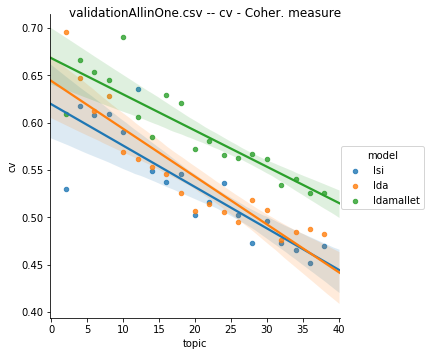

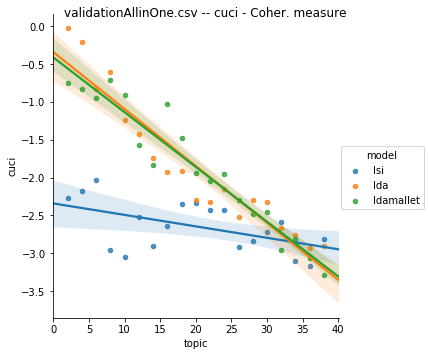

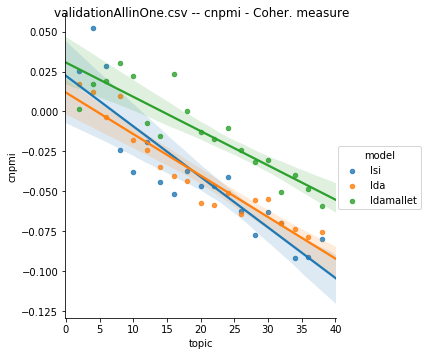

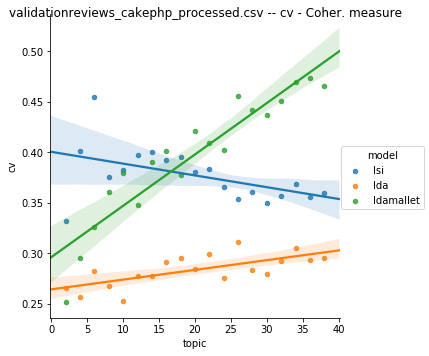

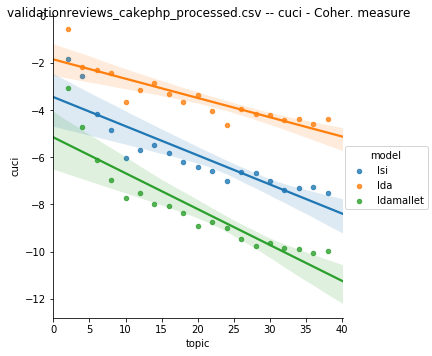

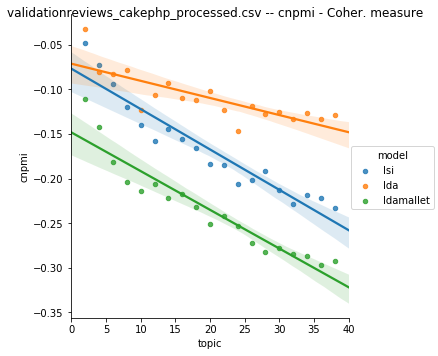

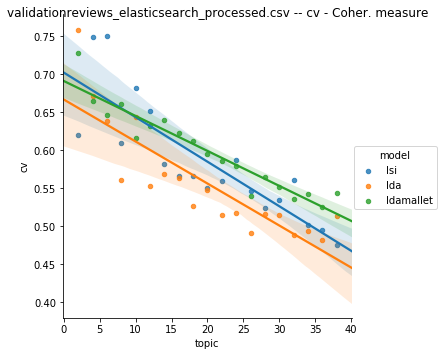

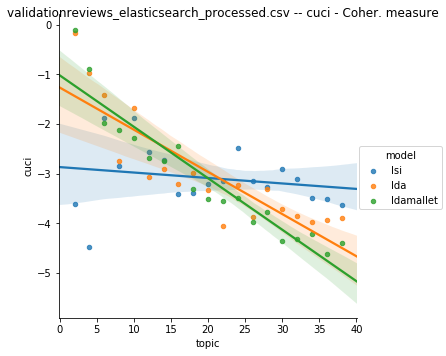

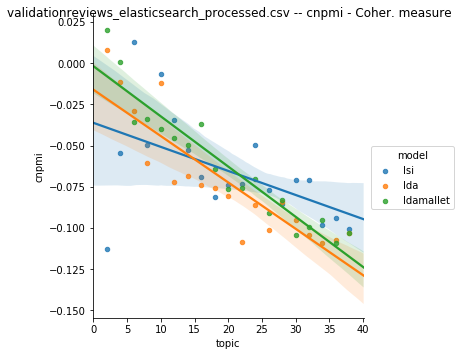

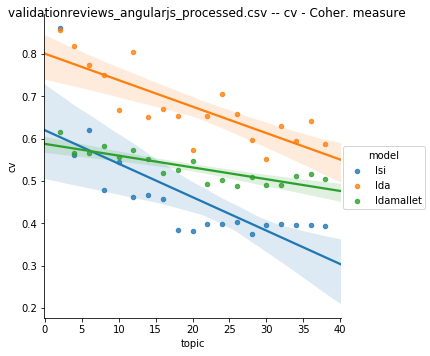

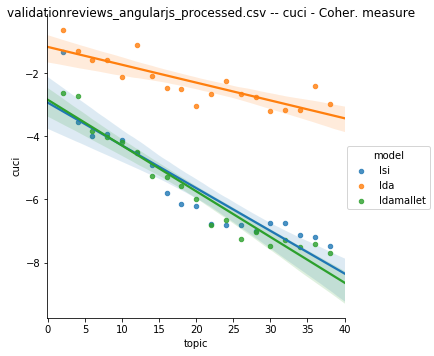

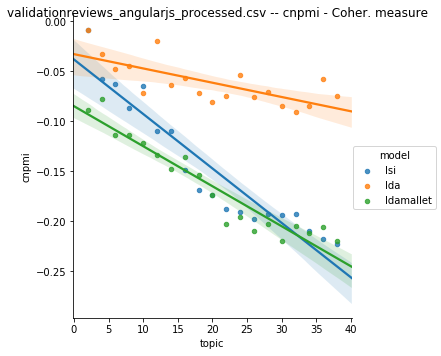

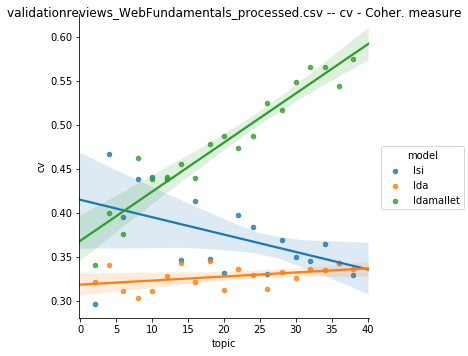

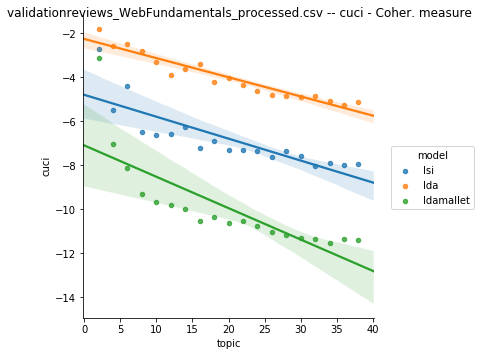

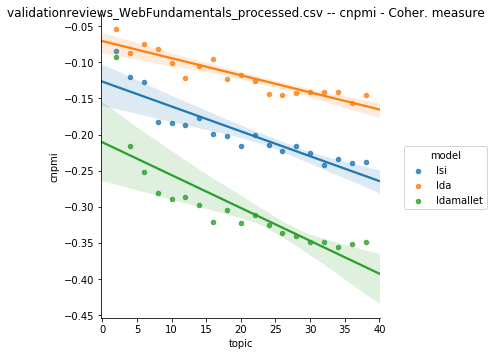

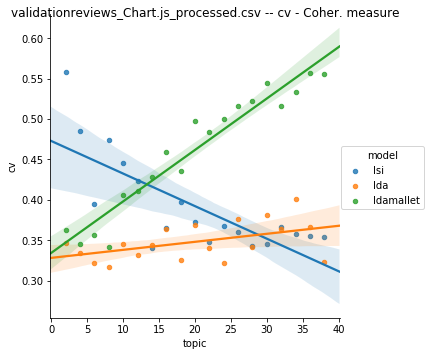

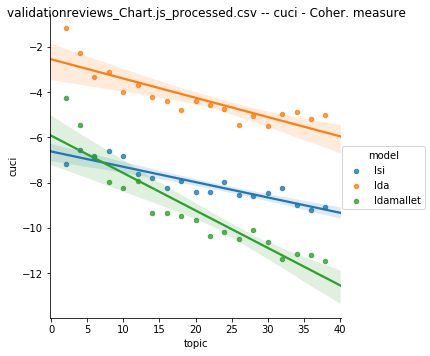

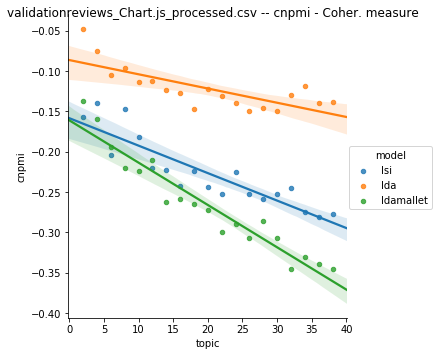

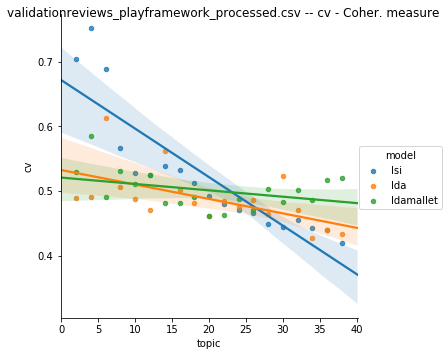

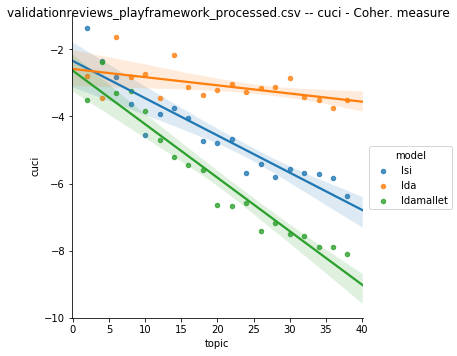

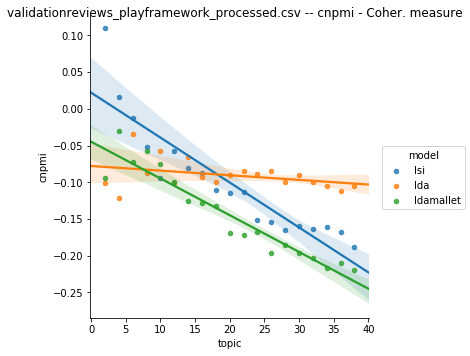

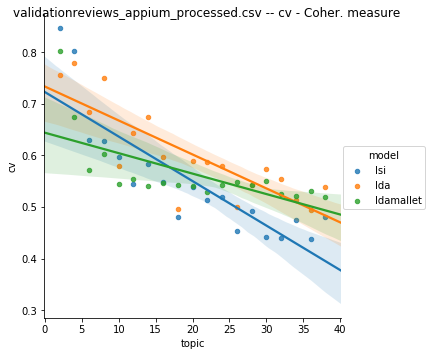

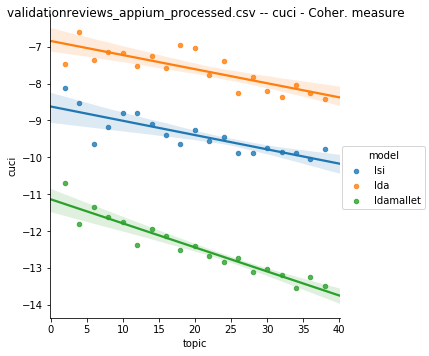

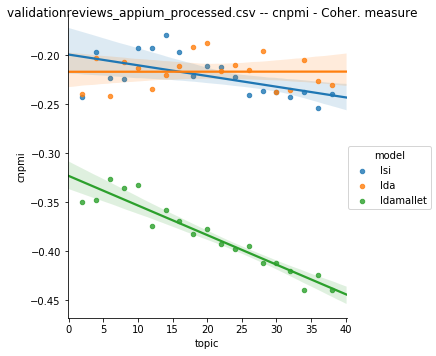

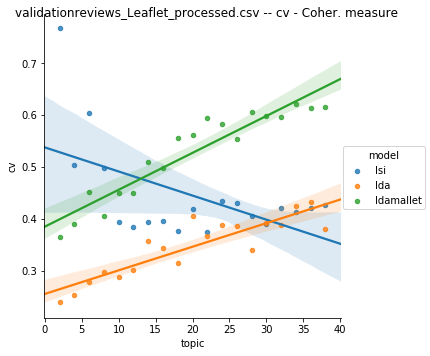

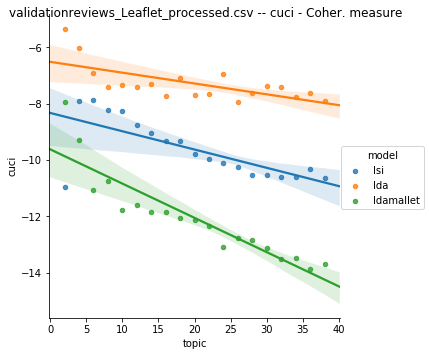

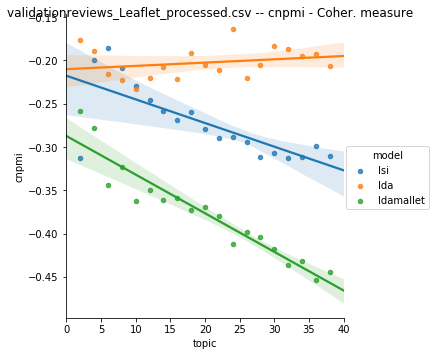

In [15]:
import glob
import os
import pandas as pd
import seaborn as sns

path="./evaluationresults/tf/"
print(os.path.isfile(path))
print(os.path.dirname(path))
print(os.path.basename(path))

filename=os.path.basename(path)
#dfResult=pd.read_csv(path, error_bad_lines=False, index_col=False, dtype='unicode')

for filename in glob.glob(os.path.join(path, '*.csv')):        
    print(filename)
    dfResult=pd.read_csv(filename)
    lmeasures=["cv","cuci","cnpmi"]
    for measure in lmeasures:
               lm=sns.lmplot(x="topic",y=measure,data=dfResult,fit_reg=True,hue="model",scatter_kws={"s":20})
               fig=lm.fig
               fig.suptitle(os.path.basename(filename)+" -- " + measure +" - Coher. measure")

    #dfResult.to_csv("./evaluationresults/validation/"+ filename)